In [1]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import scipy.linalg as lng
import matplotlib
%matplotlib qt
import seaborn as sns

In [2]:
def center(X):
    """ Center the columns (variables) of a data matrix to zero mean.
        
        X, MU = center(X) centers the observations of a data matrix such that each variable
        (column) has zero mean and also returns a vector MU of mean values for each variable.
     """ 
    n = X.shape[0]
    mu = np.mean(X,0)
    #X = X - np.ones((n,1)) * mu
    X = X - mu
    
    return X, mu

In [3]:
def normalize(X):
    """Normalize the columns (variables) of a data matrix to unit Euclidean length.
    X, MU, D = normalize(X)
    i) centers and scales the observations of a data matrix such
    that each variable (column) has unit Euclidean length. For a normalized matrix X,
    X'*X is equivalent to the correlation matrix of X.
    ii) returns a vector MU of mean values for each variable.
    iii) returns a vector D containing the Euclidean lengths for each original variable.
    
    """

    n = np.size(X, 0)
    X, mu = center(X)
    d = np.linalg.norm(X, ord = 2, axis = 0)
    d[np.where(d==0)] = 1
    X = np.divide(X, np.ones((n,1)) * d)
    return X, mu, d

In [4]:
data = pd.read_excel(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Data\Subject_Block_Session_Trial.xlsx')
Y_wNanInData = np.array(data.ScoreDifficulty.tolist())

data.dropna(inplace=True, axis=0)

Y = np.array(data.ScoreDifficulty.tolist())

X = data.drop(['ScoreDifficulty', 'Subject', 'SubjectID', 'Block', 'BlockID', 'TypingTechnique', 'TypingTechniqueID', 'Session', 'SessionDifficulty', 'Trial'], \
             axis = 1)
#X.drop(['ScoreDifficulty'], axis=1, inplace=True)

#X_norm, mu, d = normalize(X)


# Cross-correlation matrix

In [1]:
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels='auto')
#plt.xticks(rotation=15)
plt.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.savefig(r'M:\Documents\Courses\Credits\2019_04_August\Computational Data Analysis\Project\Results\Data\correlationPlot', dpi=600)

NameError: name 'X' is not defined

In [5]:
print(X.corrwith(data.ScoreDifficulty))

TotalTime                         0.603746
EffectiveTime                     0.578902
TypingSpeed                      -0.367690
ErrorRate                         0.418326
PupilAbsolute_Mean                0.073833
PupilAbsolute_Median              0.075682
PupilDifference_StartingEnding    0.072351
PupilRelative_Mean               -0.029664
PupilRelative_Median             -0.017862
PupilRelative_Start               0.132970
LHIPA                            -0.200651
BlinkCount                        0.473458
BlinkFrequency                    0.312815
BlinkDurationTotal                0.481994
BlinkDurationAverage              0.158542
dtype: float64


In [6]:
X.describe()

,TotalTime,EffectiveTime,TypingSpeed,ErrorRate,PupilAbsolute_Mean,PupilAbsolute_Median,PupilDifference_StartingEnding,PupilRelative_Mean,PupilRelative_Median,PupilRelative_Start,LHIPA_20s,BlinkCount,BlinkFrequency,BlinkDurationTotal,BlinkDurationAverage
count,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000,843.000000
mean,173.606290,109.420308,9.532441,0.175886,4.624393,4.621584,-0.002809,-0.113442,-0.116291,-0.002849,7.019254,25.384342,8.055113,3.674035,0.141083
std,118.546423,67.807720,2.979907,0.203961,0.675881,0.687384,0.029307,0.339975,0.345313,0.029459,0.349500,29.709869,6.125439,4.142581,0.037694
min,23.557898,15.511524,2.031253,0.000000,2.535654,2.505746,-0.291860,-1.217866,-1.350937,-0.291860,5.494526,0.000000,0.000000,0.000000,0.000000
25%,81.354578,56.857484,7.532809,0.003763,4.189092,4.188211,-0.012176,-0.294646,-0.304169,-0.012276,6.842306,6.500000,3.472320,0.916667,0.122222
50%,135.892316,92.716130,8.912897,0.100575,4.776599,4.769900,0.000942,-0.089943,-0.095425,0.000819,7.058972,16.000000,6.604326,2.188889,0.138889
75%,243.814982,148.960133,11.312794,0.263245,5.093968,5.099046,0.011350,0.103557,0.097131,0.011462,7.259028,32.500000,10.898741,4.944444,0.158333
max,806.589721,411.106511,21.181250,0.935574,6.393856,6.400496,0.121432,1.195893,1.247293,0.121432,7.960180,211.000000,37.109781,28.933333,0.388889


# Visualizations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD567BD518>,
      dtype=object)

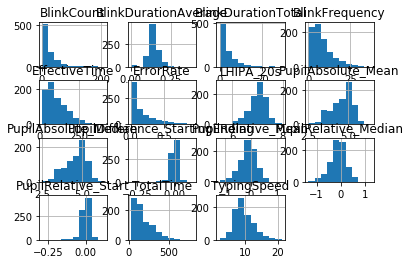

In [7]:
X.hist()

In [7]:
for columnName in data.columns:
    if columnName in ['Subject', 'SubjectID', 'BlockID', 'TypingTechniqueID', 'TypingTechnique', 'Session', 'Trial',\
                      'Block', 'SessionDifficulty', 'ScoreDifficulty']:
        continue
    data.boxplot(column=columnName, by='ScoreDifficulty', vert=False)
    plt.xlabel(columnName)
    plt.ylabel('ScoreDifficulty')
    

In [39]:
data.boxplot(column='TotalTime', by='ScoreDifficulty', vert=False)
plt.xlabel(columnName)
plt.ylabel('ScoreDifficulty')

Text(0,0.5,'ScoreDifficultyNew')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD5AB5A160>,
      dtype=object)

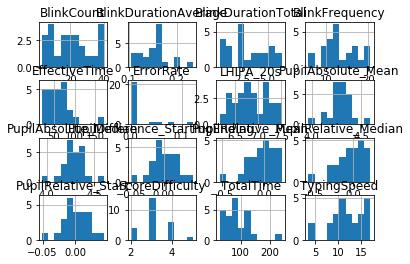

In [15]:
# To see the importance of having the session information, that might have an effect on the data

# Plot histogram for one participant, all easy sessions --

subjectID = 'ac'
sessionDifficulty = 'E'

data[np.logical_and(np.array(data.Subject==subjectID), np.array(data.SessionDifficulty==sessionDifficulty))].hist(\
column=['SessionDifficulty',
       'ScoreDifficulty', 'TotalTime', 'EffectiveTime',
       'TypingSpeed', 'ErrorRate', 'PupilAbsolute_Mean',
       'PupilAbsolute_Median',
       'PupilDifference_StartingEnding',
       'PupilRelative_Mean', 'PupilRelative_Median',
       'PupilRelative_Start', 'LHIPA_20s', 'BlinkCount',
       'BlinkFrequency', 'BlinkDurationTotal', 'BlinkDurationAverage'])


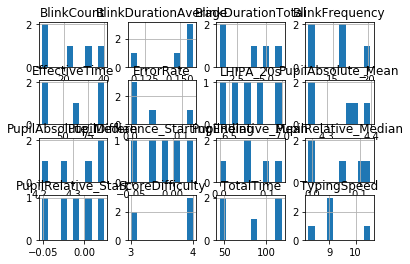

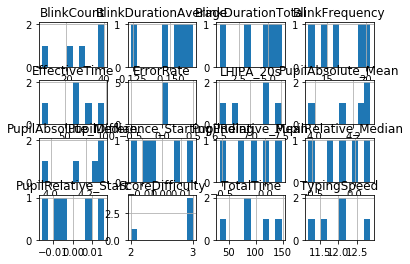

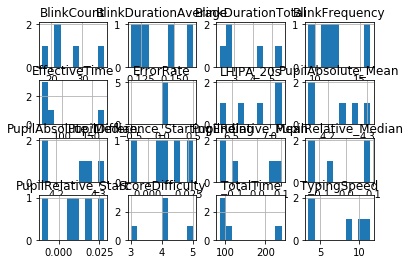

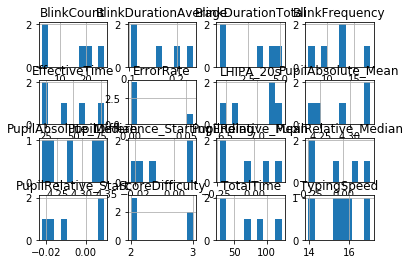

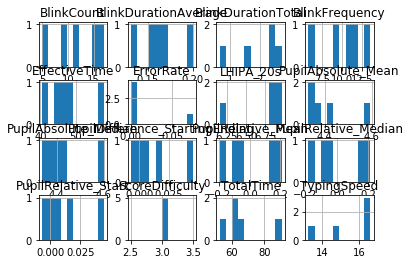

In [17]:
subjectID = 'ac'
sessionDifficulty = 'E'
block = '1'

for block in ['1', '2', '3_MS', '4', '5']:
    data[np.logical_and(np.logical_and(np.array(data.Subject==subjectID), np.array(\
    data.SessionDifficulty==sessionDifficulty)), np.array(data.Block==block))].hist(column=['SessionDifficulty',
       'ScoreDifficulty', 'TotalTime', 'EffectiveTime',
       'TypingSpeed', 'ErrorRate', 'PupilAbsolute_Mean',
       'PupilAbsolute_Median',
       'PupilDifference_StartingEnding',
       'PupilRelative_Mean', 'PupilRelative_Median',
       'PupilRelative_Start', 'LHIPA_20s', 'BlinkCount',
       'BlinkFrequency', 'BlinkDurationTotal', 'BlinkDurationAverage'])


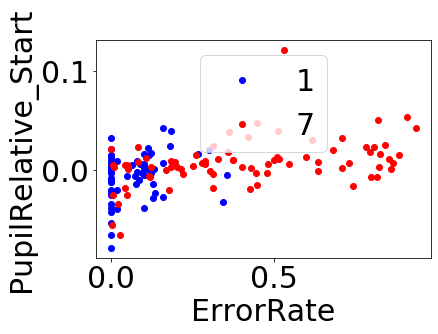

In [12]:
# In comparison to the PCA components, if any pair of variables also show the difference in 1 and 7 scores
y_variable = 'PupilRelative_Start'
x_variable = 'ErrorRate'
level_1 = 1
level_2 = 7

plt.figure()
indices = Y == level_1
plt.plot(X[x_variable][indices], X[y_variable][indices], 'ob', label = level_1)

indices = Y == level_2
plt.plot(X[x_variable][indices], X[y_variable][indices], 'or', label = level_2)

plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.legend()
plt.rcParams.update({'font.size': 26})